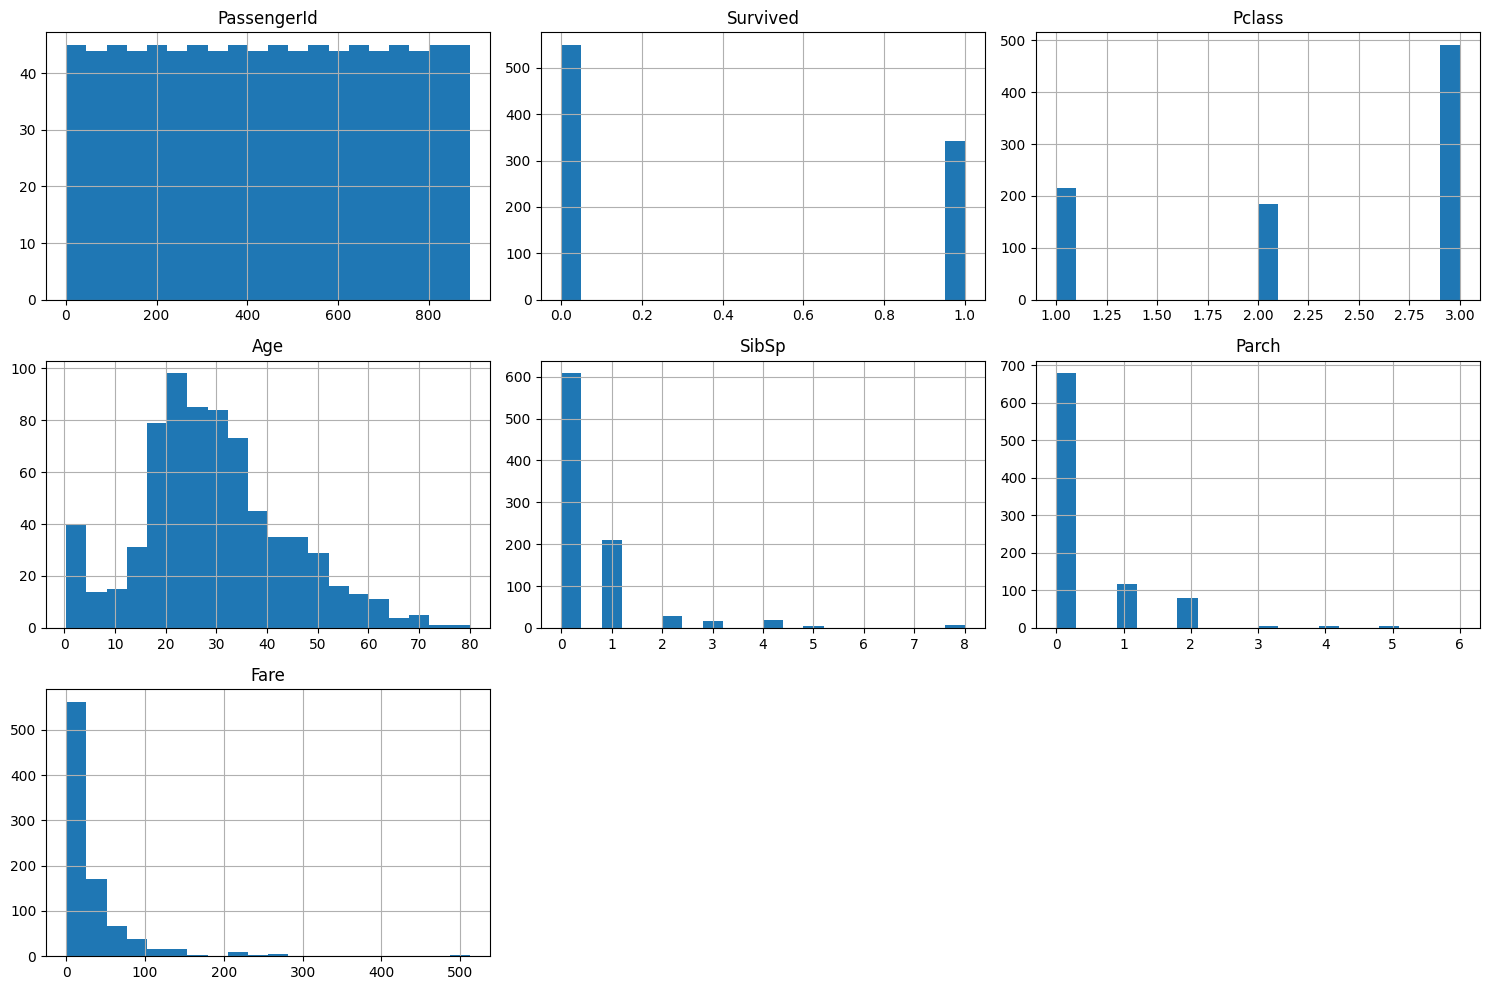

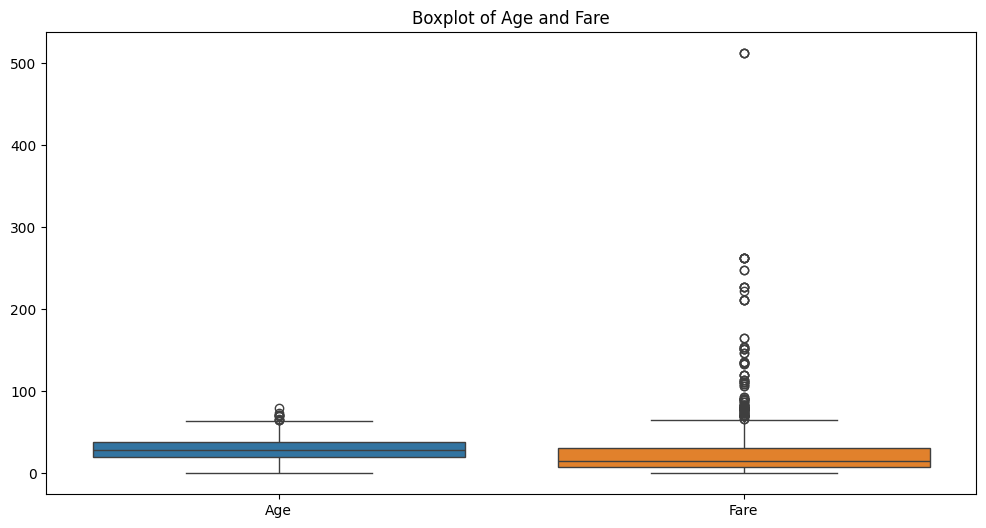

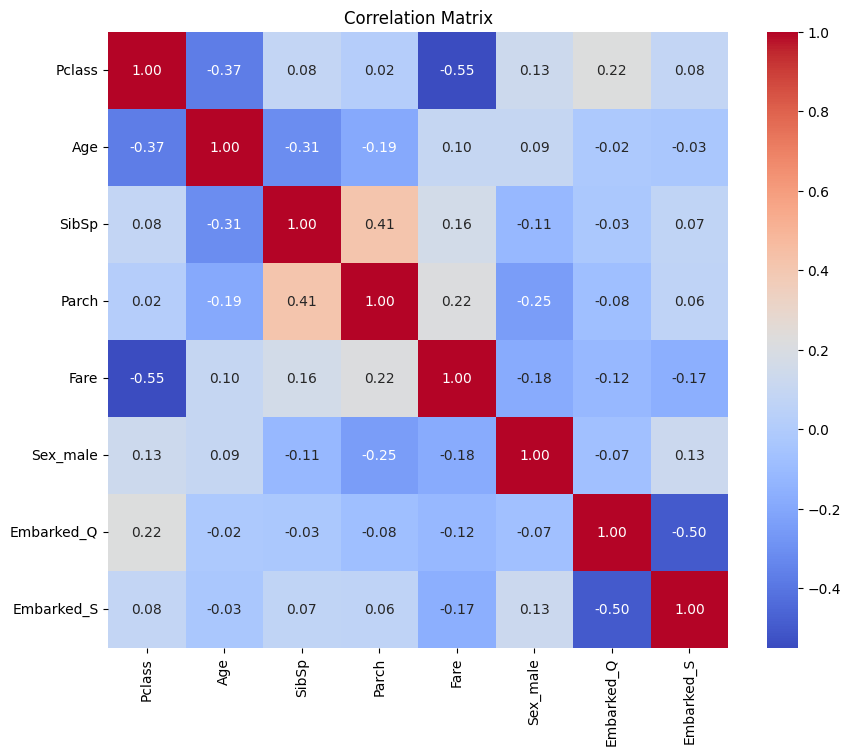

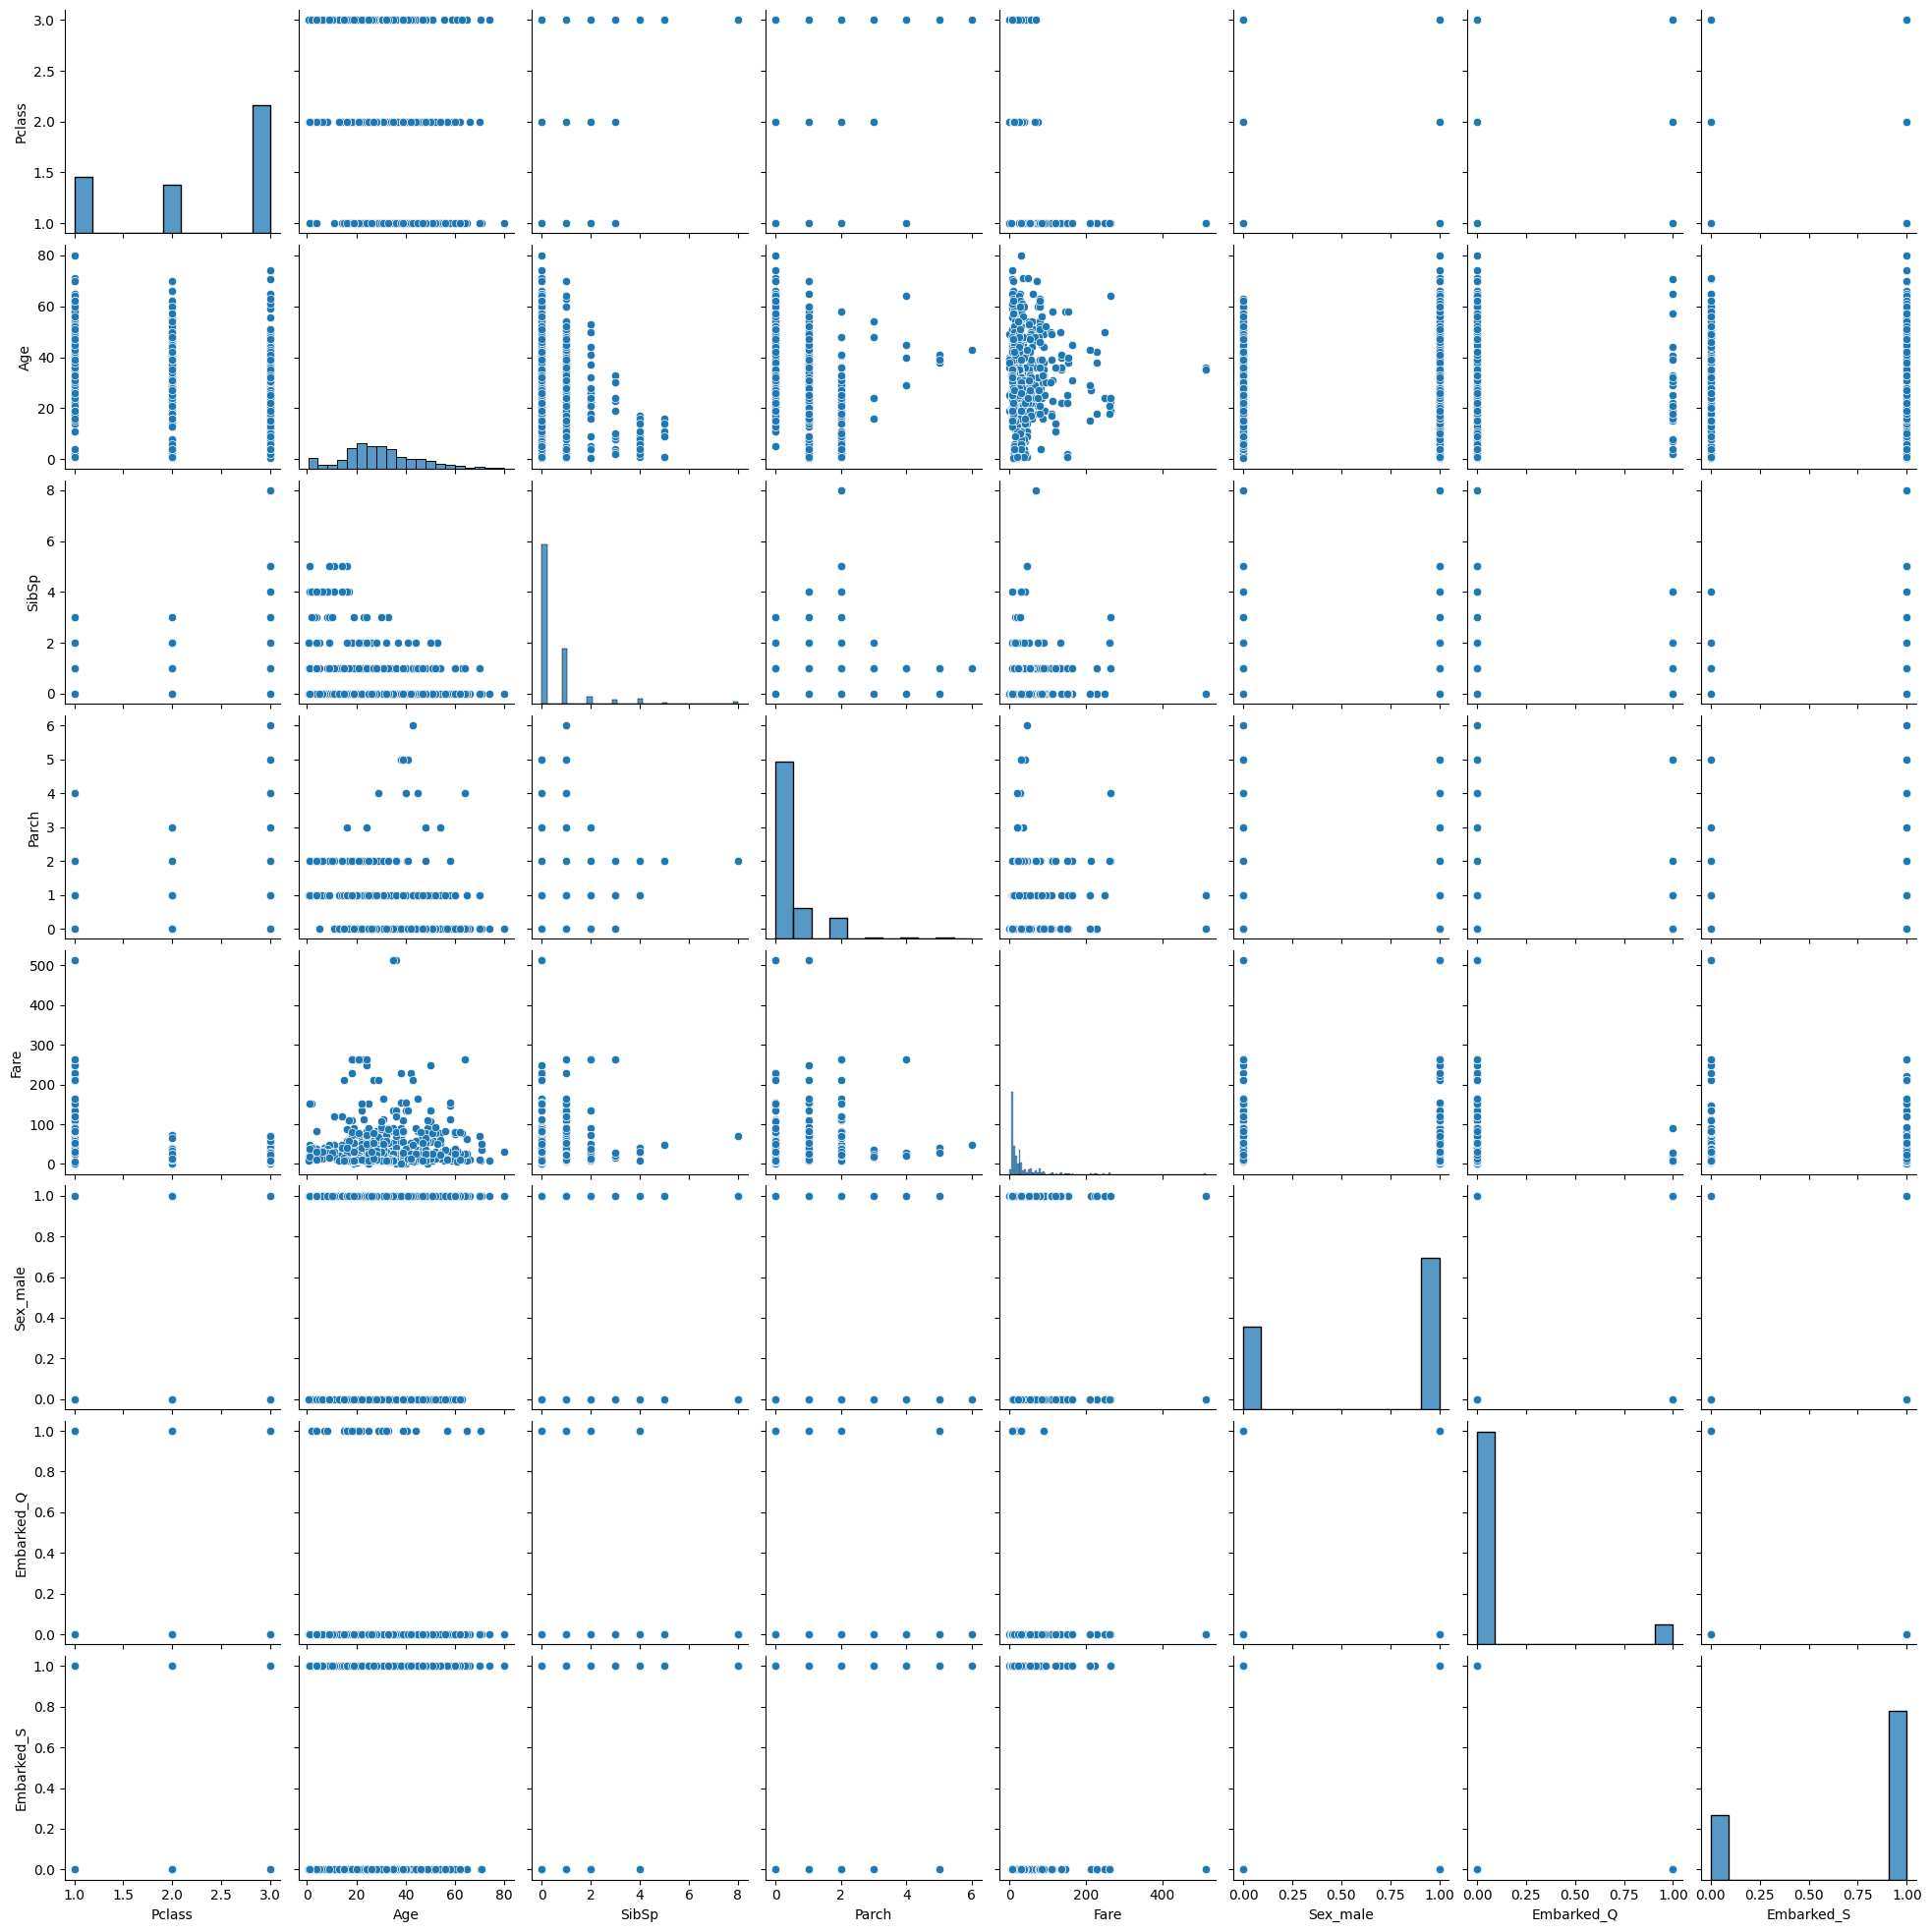

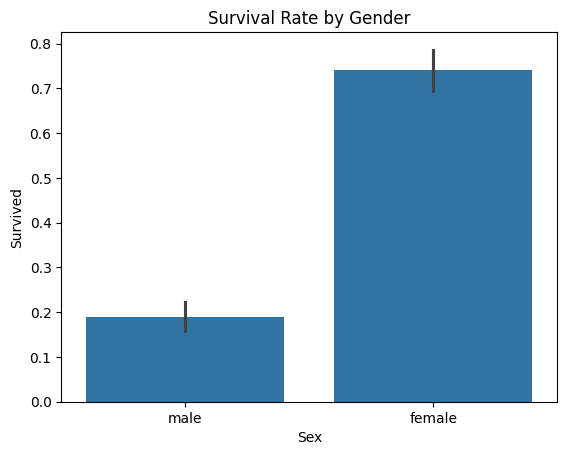

Number of Fare outliers: 116


In [2]:

# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()


# Summary statistics
df.describe(include='all')


# Histograms
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')
plt.show()

# Convert categorical data before correlation
df_encoded = pd.get_dummies(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], drop_first=True)

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df_encoded)
plt.show()



# %% [code]
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Outlier detection
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Fare'] < Q1 - 1.5 * IQR) | (df['Fare'] > Q3 + 1.5 * IQR)]
print(f"Number of Fare outliers: {len(outliers)}")



